## Airbnb en Nueva York

Para este ejercicio, usaremos el famoso dataset de "Airbnb en Nueva York". Este dataset incluye información sobre las propiedades listadas en Airbnb, con datos como el barrio, tipo de habitación, precio, número de noches mínimas, entre otros.

No os voy a engañar: el dataset promete pero luego es mas aburrido que contar las rayas de la carta de ajuste.

**Enlace al dataset:** [Airbnb en NYC](https://raw.githubusercontent.com/datasets/nyc-airbnb/master/airbnb.csv)



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el dataset
url = "https://raw.githubusercontent.com/jarrodtky/Airbnb-NewYork_EDA-TextAnalysis_Python/refs/heads/main/Airbnb-NewYork_Dataset.csv"
df = pd.read_csv(url)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,46,14/7/2019,0.39,2,288
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,274,26/7/2019,4.64,1,212
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,75,21/7/2019,0.60,1,127


In [4]:
# importing the style package 
from matplotlib import style 
  
  
# using the style for the plot 
plt.style.use('seaborn-v0_8-pastel') 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48864 entries, 0 to 48863
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48864 non-null  int64  
 1   name                            48848 non-null  object 
 2   host_id                         48864 non-null  int64  
 3   host_name                       48846 non-null  object 
 4   neighbourhood_group             48864 non-null  object 
 5   neighbourhood                   48864 non-null  object 
 6   latitude                        48864 non-null  float64
 7   longitude                       48864 non-null  float64
 8   room_type                       48864 non-null  object 
 9   price                           48864 non-null  int64  
 10  minimum_nights                  48864 non-null  int64  
 11  number_of_reviews               48864 non-null  int64  
 12  last_review                     

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48864.0,1.940851e+07,1.124290e+07,2595.00000,9.577635e+06,1.994839e+07,2.974014e+07,3.749909e+07
host_id,48864.0,6.943161e+07,8.058217e+07,2438.00000,8.048590e+06,3.168654e+07,1.096553e+08,2.830244e+08
latitude,48864.0,4.072866e+01,5.479435e-02,40.49979,4.068980e+01,4.072288e+01,4.076297e+01,4.091240e+01
longitude,48864.0,-7.395185e+01,4.643992e-02,-74.24442,-7.398295e+01,-7.395551e+01,-7.393563e+01,-7.371299e+01
price,48864.0,1.514532e+02,2.365855e+02,0.00000,6.900000e+01,1.050000e+02,1.750000e+02,1.000000e+04
minimum_nights,48864.0,7.093116e+00,2.026417e+01,1.00000,1.000000e+00,2.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48864.0,2.339219e+01,4.493969e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.390000e+02
reviews_per_month,38733.0,1.365694e+00,1.692891e+00,0.01000,1.900000e-01,7.100000e-01,2.000000e+00,6.661000e+01
calculated_host_listings_count,48864.0,7.438278e+00,3.494905e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.430000e+02
availability_365,48864.0,1.124835e+02,1.323740e+02,0.00000,0.000000e+00,4.100000e+01,2.320000e+02,3.650000e+02


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48864 entries, 0 to 48863
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48864 non-null  int64         
 1   name                            48848 non-null  object        
 2   host_id                         48864 non-null  int64         
 3   host_name                       48846 non-null  object        
 4   neighbourhood_group             48864 non-null  object        
 5   neighbourhood                   48864 non-null  object        
 6   latitude                        48864 non-null  float64       
 7   longitude                       48864 non-null  float64       
 8   room_type                       48864 non-null  object        
 9   price                           48864 non-null  int64         
 10  minimum_nights                  48864 non-null  int64         
 11  nu

,count,mean,min,25%,50%,75%,max,std
id,48864.0,19408512.29799,2595.0,9577635.0,19948394.0,29740143.25,37499093.0,11242904.616471
host_id,48864.0,69431614.496296,2438.0,8048590.5,31686535.5,109655267.25,283024389.0,80582166.042969
latitude,48864.0,40.728664,40.49979,40.689797,40.72288,40.76297,40.9124,0.054794
longitude,48864.0,-73.95185,-74.24442,-73.982953,-73.95551,-73.935628,-73.71299,0.04644
price,48864.0,151.453176,0.0,69.0,105.0,175.0,10000.0,236.585525
minimum_nights,48864.0,7.093116,1.0,1.0,2.0,5.0,1250.0,20.26417
number_of_reviews,48864.0,23.392191,0.0,1.0,5.0,24.0,639.0,44.93969
last_review,38733,2018-10-25 05:31:03.991944704,2011-03-28 00:00:00,2018-07-27 00:00:00,2019-06-07 00:00:00,2019-07-21 00:00:00,2019-08-15 00:00:00,NaN
reviews_per_month,38733.0,1.365694,0.01,0.19,0.71,2.0,66.61,1.692891
calculated_host_listings_count,48864.0,7.438278,1.0,1.0,1.0,2.0,343.0,34.949053


In [10]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,46,14/7/2019,0.39,2,288
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,274,26/7/2019,4.64,1,212
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,75,21/7/2019,0.60,1,127
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,5/10/2017,0.39,1,0
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,434,13/7/2019,3.48,1,239
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21/7/2017,0.98,1,0
8,5222,Best Hideaway,7516,Marilyn,Manhattan,East Village,40.72764,-73.97949,Entire home/apt,116,30,94,15/6/2016,0.74,1,322
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,161,29/7/2019,1.33,4,0



1. **Número de listados por barrio.** Agrupa los datos por barrio y cuenta cuántos listados hay en cada uno.


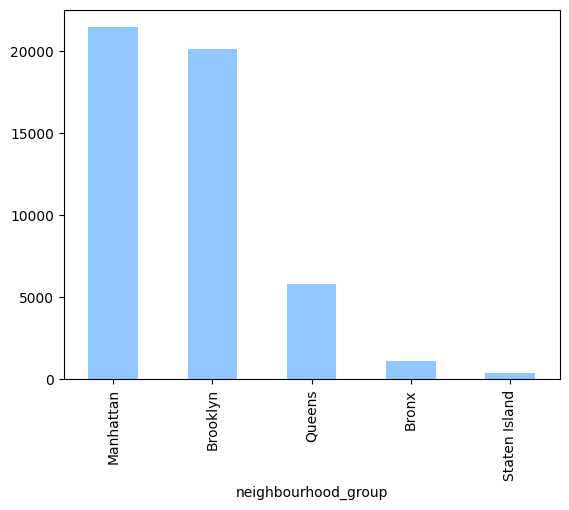

In [11]:
listings_per_neighbourhood = df.loc[:,'neighbourhood_group'].value_counts()
listings_per_neighbourhood.plot(kind='bar');

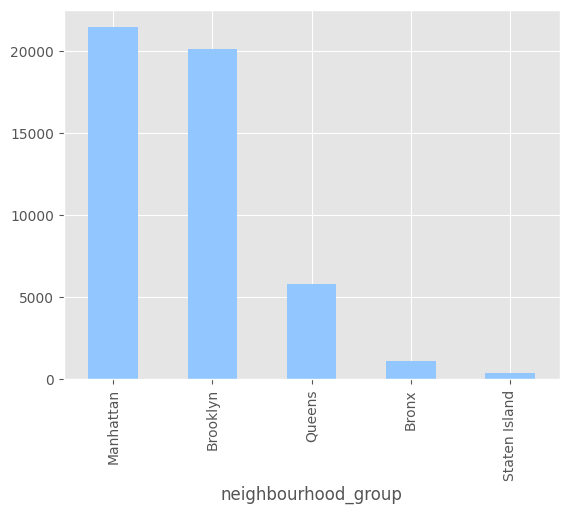

In [ ]:

listings_per_neighbourhood = df['neighbourhood_group'].value_counts()
listings_per_neighbourhood.plot(kind='bar');



2. **Promedio de precio por tipo de habitación.** Agrupa por tipo de habitación y calcula el precio promedio.



In [12]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,46,14/7/2019,0.39,2,288
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,274,26/7/2019,4.64,1,212
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,75,21/7/2019,0.60,1,127


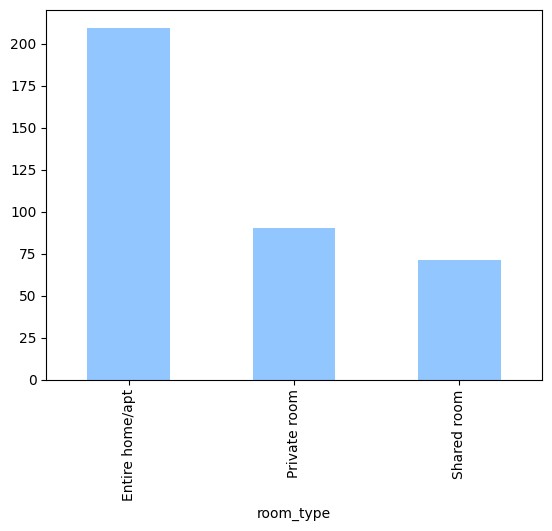

In [13]:
ex2 = df.groupby("room_type")["price"].mean()
ex2.plot(kind='bar');

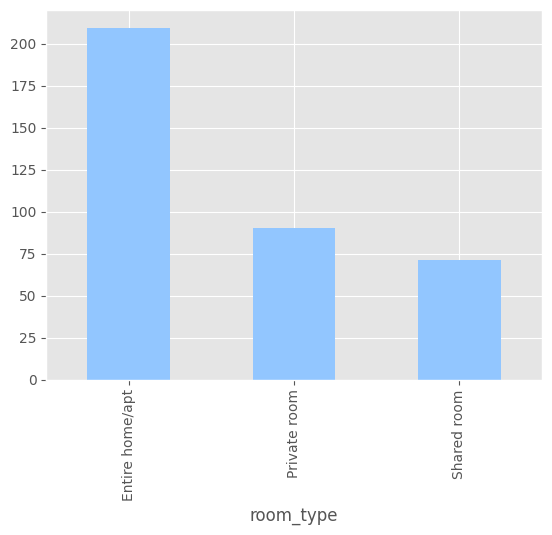



3. **Precio promedio por barrio.** Calcula el precio promedio en cada barrio.


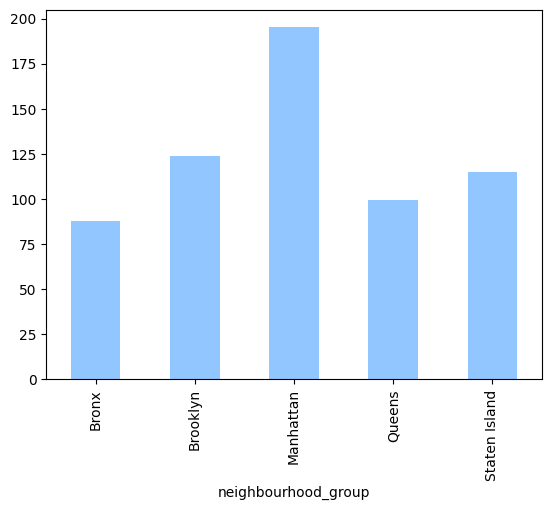

In [14]:
ex3 = df.groupby("neighbourhood_group")["price"].mean()
ex3.plot(kind='bar');

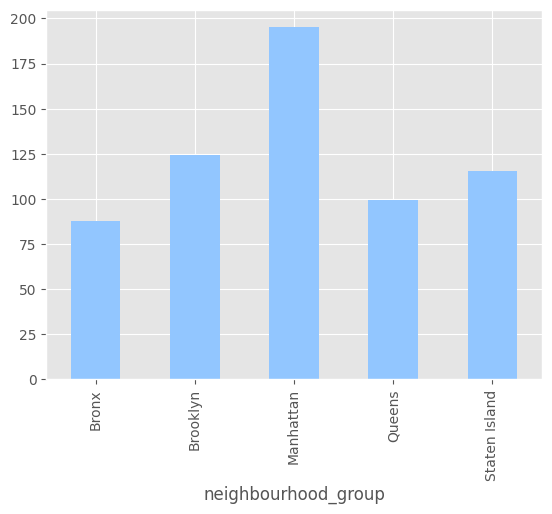



4. **Distribución de precios.** Grafica un histograma de los precios para visualizar la distribución de estos. (100 bins)


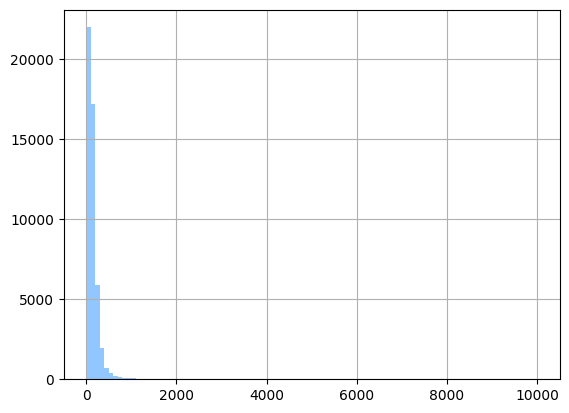

In [16]:
ex4 = df.loc[:,"price"]
ex4.hist(bins=100);

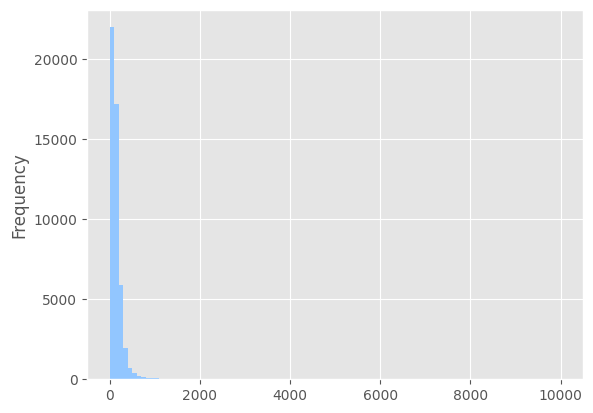


5. **Distribución de noches mínimas.** Visualiza la distribución de noches mínimas requeridas en los listados.
  


In [5]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,46,14/7/2019,0.39,2,288
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,274,26/7/2019,4.64,1,212
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,75,21/7/2019,0.60,1,127


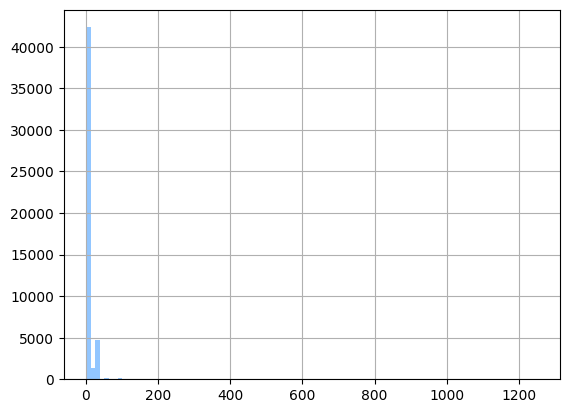

In [12]:
ex5 = df.loc[:,"minimum_nights"]
ex5.hist(bins=100);

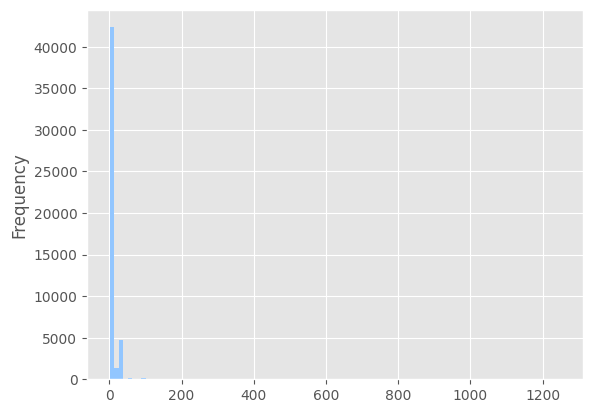


6. **Precio promedio por tipo de habitación en Manhattan.** Filtra los datos para Manhattan y calcula el precio promedio por tipo de habitación.


In [9]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,46,14/7/2019,0.39,2,288
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,274,26/7/2019,4.64,1,212
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,75,21/7/2019,0.60,1,127


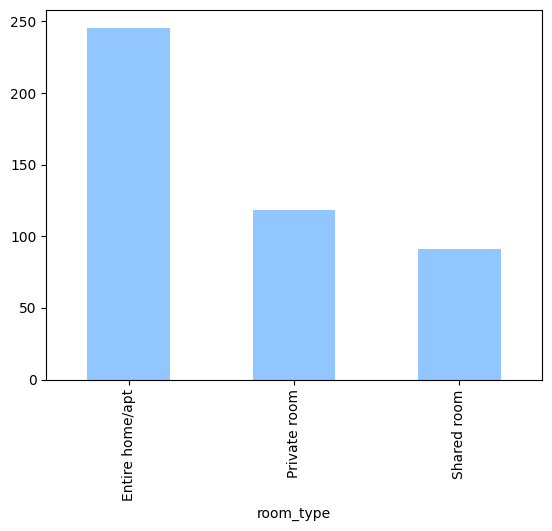

In [11]:
ex6= df.loc[df.loc[:,"neighbourhood_group"] == "Manhattan"].groupby("room_type")["price"].mean()
ex6.plot(kind='bar');

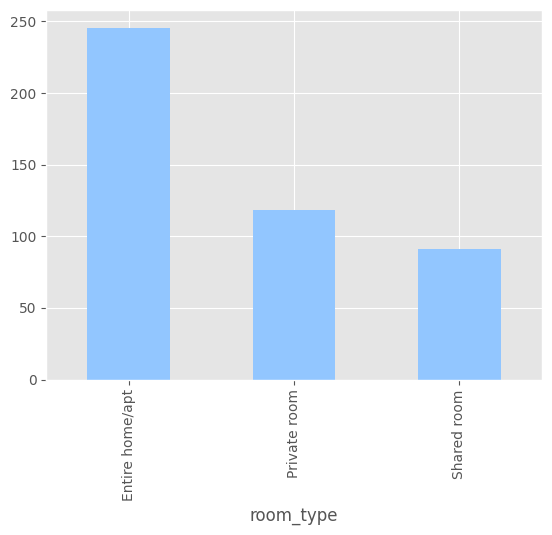


7. **Top 10 listados más caros.** Ordena los listados por precio de mayor a menor y muestra los 10 más caros.


In [16]:
ex7 = df.sort_values("price",ascending=False).head(10).loc[:,["name","neighbourhood_group","price"]]
ex7

,name,neighbourhood_group,price
17398,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,10000
8987,Furnished room in Astoria apartment,Queens,10000
28711,1-BR Lincoln Center,Manhattan,10000
39397,2br - The Heart of NYC: Manhattans Lower East ...,Manhattan,9999
12136,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,9999
6401,Spanish Harlem Apt,Manhattan,9999
29695,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,Manhattan,8500
4282,Film Location,Brooklyn,8000
44294,Gem of east Flatbush,Brooklyn,7500
41381,70' Luxury MotorYacht on the Hudson,Manhattan,7500


In [ ]:

top_10_expensive


,name,neighbourhood_group,price
17398,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,10000
28711,1-BR Lincoln Center,Manhattan,10000
8987,Furnished room in Astoria apartment,Queens,10000
12136,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,9999
39397,2br - The Heart of NYC: Manhattans Lower East ...,Manhattan,9999
6401,Spanish Harlem Apt,Manhattan,9999
29695,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,Manhattan,8500
4282,Film Location,Brooklyn,8000
44294,Gem of east Flatbush,Brooklyn,7500
41381,70' Luxury MotorYacht on the Hudson,Manhattan,7500



8. **Correlación entre precio y noches mínimas.** Calcula la correlación entre el precio y el número de noches mínimas requeridas.


In [19]:
df.loc[:,"price"].corr(df.loc[:,"minimum_nights"])

np.float64(0.05556909172277982)

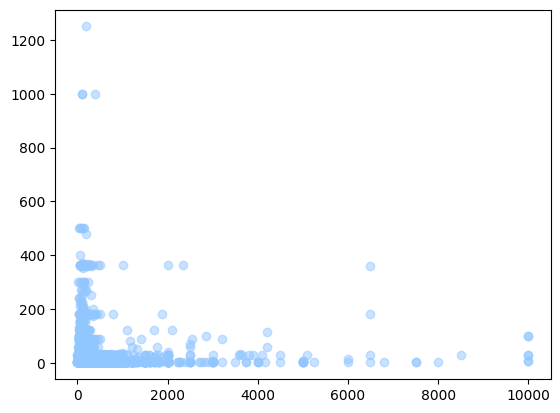

In [17]:
plt.scatter(df.loc[:,'price'], df.loc[:,'minimum_nights'], alpha=0.5)

In [ ]:


correlation_price_nights

np.float64(0.05556909172277982)

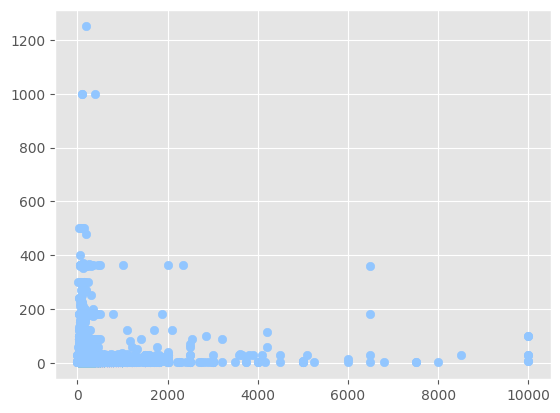


9. **Promedio de noches mínimas por tipo de habitación.** Agrupa por tipo de habitación y calcula el promedio de noches mínimas.
 


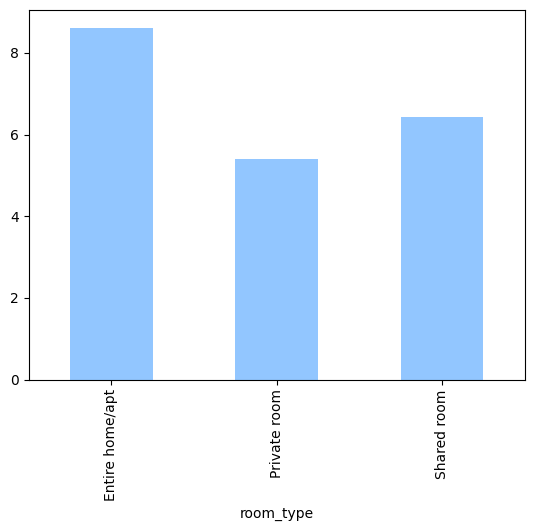

In [21]:
ex9= df.groupby("room_type")["minimum_nights"].mean()
ex9.plot(kind='bar');

<Axes: xlabel='room_type'>

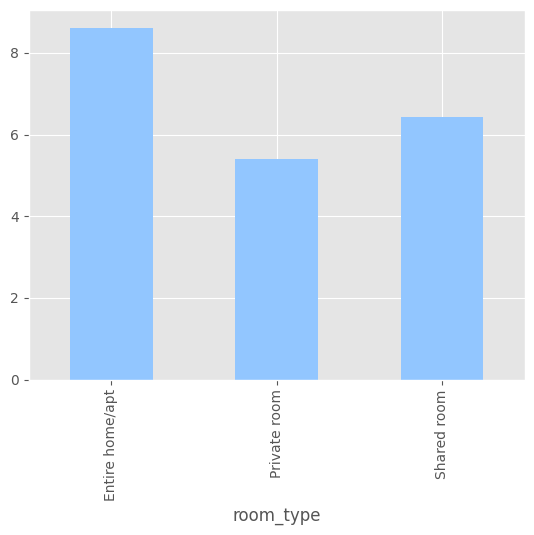


10. **Barrio con mayor cantidad de listados.** Identifica el barrio con más listados.


In [25]:
df.loc[:,"neighbourhood_group"].value_counts().reset_index().sort_values("count",ascending=False)

,neighbourhood_group,count
0,Manhattan,21456
1,Brooklyn,20114
2,Queens,5811
3,Bronx,1105
4,Staten Island,378



11. **Distribución de precios en Brooklyn.** Filtra por el barrio de Brooklyn y muestra la distribución de precios (hist).


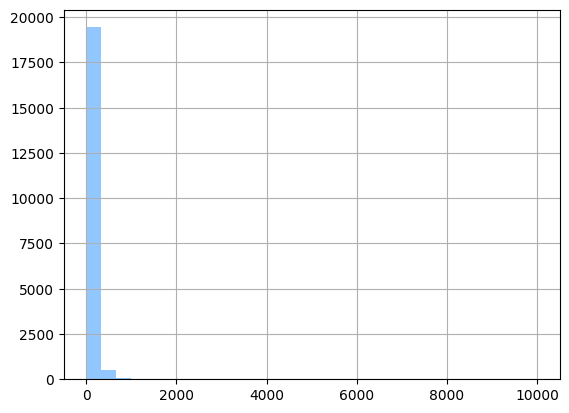

In [37]:
ex11 = df.loc[df.loc[:,"neighbourhood_group"] == "Brooklyn",:].loc[:,"price"]
ex11.hist(bins=30);

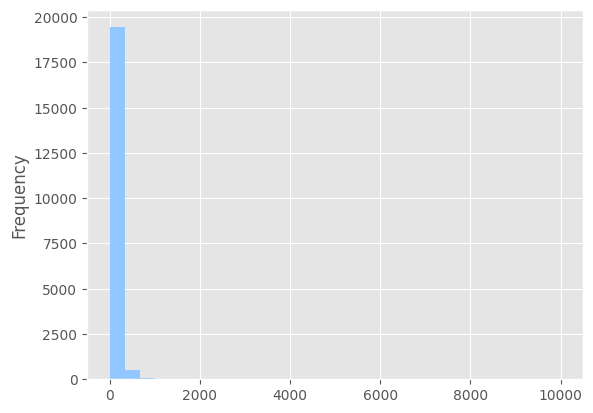



12. **Listados con más de un mes de noches mínimas en Queens.** Filtra los listados en Queens que requieren más un mes de noches mínimas.


In [47]:
ex12 = df.loc[(df.loc[:,"neighbourhood_group"] == "Queens") & (df.loc[:,"minimum_nights"] > 30),:].loc[:,["name","price","minimum_nights"]]
ex12

,name,price,minimum_nights
437,Female Only Clean15min to Manhattan,42,40
451,Sunny 15min to Manhattan LADY only,42,40
463,Lady only Curtain-divided room,33,44
1018,Only 5 Min. to Manhattan!,50,180
1310,Comfy New York City Launching Pad!!,69,40
1665,"Sublet Lovely Room in Astoria, 3-4 months",55,80
2501,Lovely 1-bedroom-heart of Astoria,80,70
4179,"Safe Clean Sunny, 15 min Manhattan",65,50
5624,Quiet bedroom in a waste free household,50,31
5734,Location Little Marcela,39,31


In [ ]:


  
queens_minimum_5

,name,price,minimum_nights
437,Female Only Clean15min to Manhattan,42,40
451,Sunny 15min to Manhattan LADY only,42,40
463,Lady only Curtain-divided room,33,44
1018,Only 5 Min. to Manhattan!,50,180
1310,Comfy New York City Launching Pad!!,69,40
1665,"Sublet Lovely Room in Astoria, 3-4 months",55,80
2501,Lovely 1-bedroom-heart of Astoria,80,70
4179,"Safe Clean Sunny, 15 min Manhattan",65,50
5624,Quiet bedroom in a waste free household,50,31
5734,Location Little Marcela,39,31



13. **Precio promedio por barrio de solo aquellos listados con más de 3 noches mínimas.** Filtra listados con más de 3 noches y calcula el precio promedio por barrio.


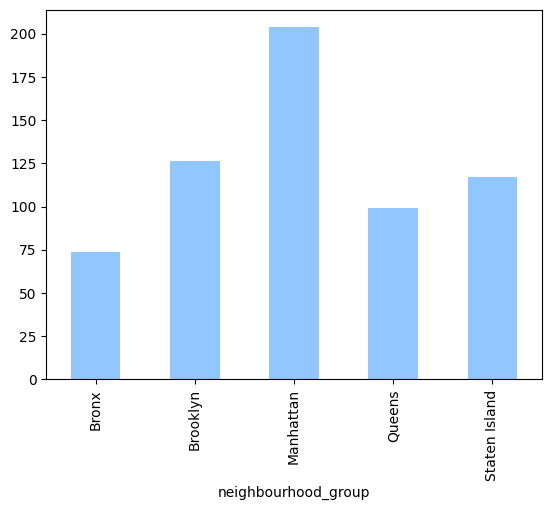

In [56]:
ex12 = df.loc[df.loc[:,"minimum_nights"] > 3,:].groupby("neighbourhood_group")["price"].mean()
ex12.plot(kind='bar');

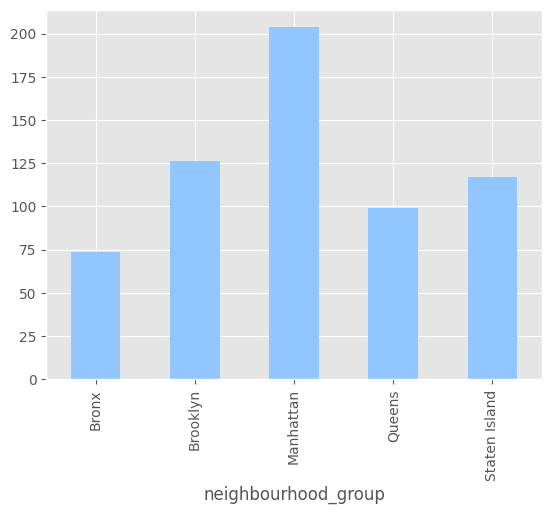


14. **Comparación de precios entre listados con una noche mínima y más de una noche.** Compara el precio promedio entre listados con exactamente 1 noche mínima y más de 1 noche.


In [67]:
mean1 = df.loc[df.loc[:,"minimum_nights"] == 1,"price"].mean()
mean2 = df.loc[df.loc[:,"minimum_nights"] > 1,"price"].mean()

print("Media precios 1 noche:", mean1)
print("Media precios +1 noche:", mean2)

Media precios 1 noche: 138.61097551373908
Media precios +1 noche: 155.9635539086912


In [ ]:

print("Media precios 1 noche:", one_night)
print("Media precios +1 noche:", more_than_one_night)


Media precios 1 noche: 138.61097551373908
Media precios +1 noche: 155.9635539086912



15. **Distribución de precios en Harlem.** Filtra los listados en Harlem y grafica la distribución de precios.


<Axes: >

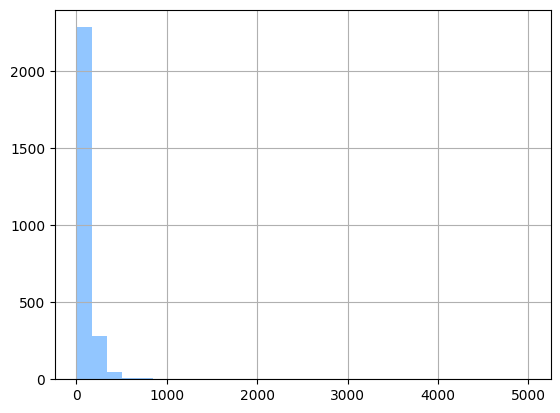

In [71]:
ex15 = df.loc[df.loc[:,"neighbourhood"] == "Harlem","price"]
ex15.hist(bins=30)

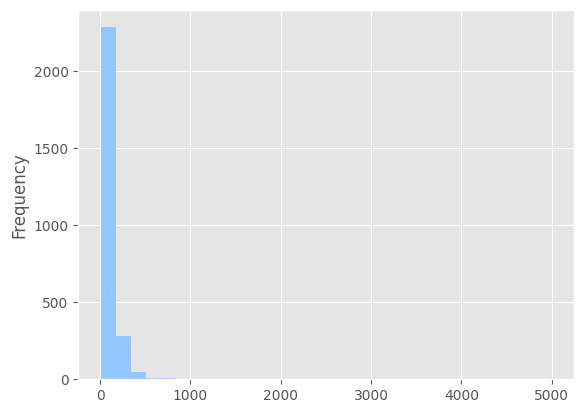


16. **Listados de precio menor a 100 en Manhattan.** Filtra los listados de Manhattan con un precio menor a 100.


In [ ]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,46,14/7/2019,0.39,2,288
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,274,26/7/2019,4.64,1,212
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,75,21/7/2019,0.60,1,127


In [77]:
ex16 = df.loc[(df.loc[:,"neighbourhood_group"] == "Manhattan") & (df.loc[:,"price"] < 100),:]
ex16

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,434,13/7/2019,3.48,1,239
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21/7/2017,0.98,1,0
11,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,190,21/7/2019,1.50,1,23
24,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48807,37479756,Central Park and More,278252868,Edward,Manhattan,Upper West Side,40.79395,-73.96330,Private room,50,3,0,NaN,NaN,1,132
48809,37482061,Classic New York Apartment,213725189,Bernadette,Manhattan,Harlem,40.82621,-73.94486,Private room,65,1,0,NaN,NaN,1,1
48823,37488481,Harlem Haven,118674123,Tina,Manhattan,East Harlem,40.79995,-73.94122,Private room,70,1,1,5/8/2019,1.00,1,64
48860,37497989,East Harlem's Best Kept Secret,299391,Alquena,Manhattan,East Harlem,40.80504,-73.93774,Private room,60,2,0,NaN,NaN,1,53


In [ ]:


cheap_manhattan

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,434,13/7/2019,3.48,1,239
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21/7/2017,0.98,1,0
11,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,190,21/7/2019,1.50,1,23
24,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48807,37479756,Central Park and More,278252868,Edward,Manhattan,Upper West Side,40.79395,-73.96330,Private room,50,3,0,NaN,NaN,1,132
48809,37482061,Classic New York Apartment,213725189,Bernadette,Manhattan,Harlem,40.82621,-73.94486,Private room,65,1,0,NaN,NaN,1,1
48823,37488481,Harlem Haven,118674123,Tina,Manhattan,East Harlem,40.79995,-73.94122,Private room,70,1,1,5/8/2019,1.00,1,64
48860,37497989,East Harlem's Best Kept Secret,299391,Alquena,Manhattan,East Harlem,40.80504,-73.93774,Private room,60,2,0,NaN,NaN,1,53



17. **Precio promedio por tipo de habitación y barrio.** Calcula el precio promedio agrupando por barrio y tipo de habitación.

**TRUQUI:** Hay que hacer un groupby doble y despues en vez de usar el tipico "reset_index" usa un "unstack()". Si a la salida de esa operacion le haces un "plot(kind="bar", stacked=True)" sale  la solucion 

<Axes: xlabel='neighbourhood_group'>

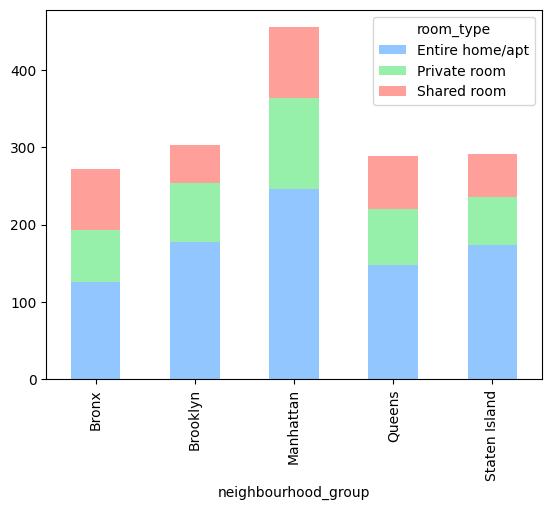

In [81]:
ex17 = df.groupby(["neighbourhood_group","room_type"])["price"].mean().unstack()
ex17.plot(kind="bar",stacked=True)

In [82]:
ex17

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,126.084656,66.965099,78.588235
Brooklyn,177.641610,76.537953,48.866029
Manhattan,245.705454,118.139705,90.949045
Queens,148.068461,71.703067,68.294118
Staten Island,173.016575,62.385027,56.300000


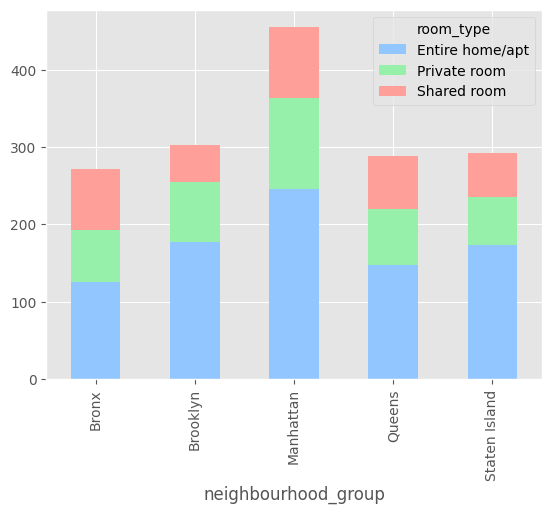


18. **Top 2 barrios con menor precio promedio.** Calcula el precio promedio en cada barrio y muestra los 2 barrios con menor precio.


In [87]:
df.groupby("neighbourhood_group")["price"].mean().sort_values(ascending=True).head(2).reset_index()

,neighbourhood_group,price
0,Bronx,87.904072
1,Queens,99.417140


In [ ]:

cheapest_neighbourhoods


,neighbourhood_group,price
0,Bronx,87.904072
1,Queens,99.417140



19. **Número de listados por tipo de habitación en Brooklyn.** Filtra los datos para Brooklyn y cuenta cuántos listados hay de cada tipo de habitación.


<Axes: xlabel='room_type'>

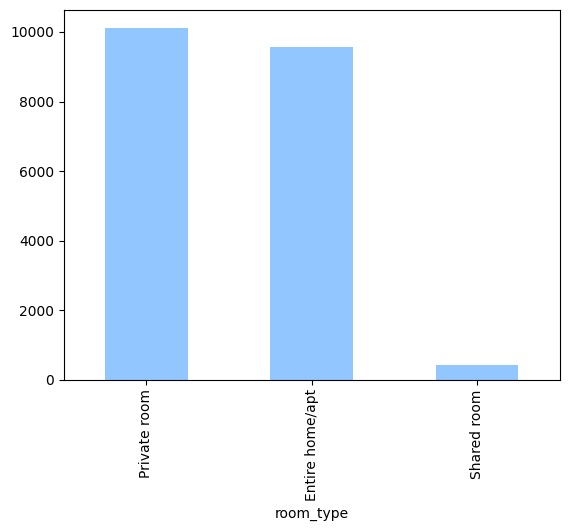

In [97]:
ex19 = df.loc[df.loc[:,"neighbourhood_group"] == "Brooklyn",:].groupby("room_type")["name"].count().sort_values(ascending=False)
ex19.plot(kind="bar")

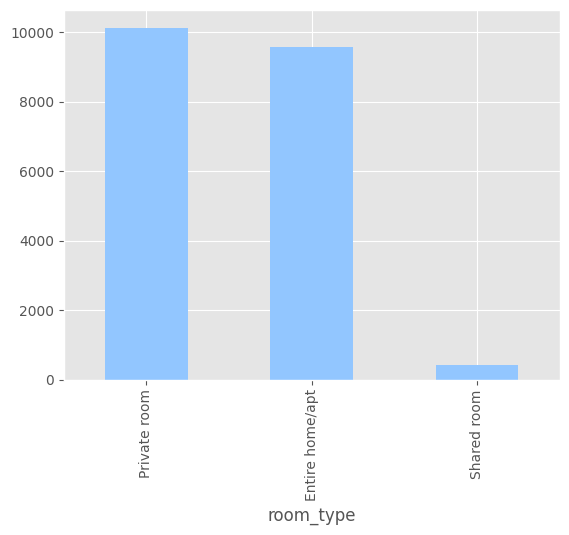


20. **Relación entre precio y número de reseñas.** Grafica un scatter plot entre precio y número de reseñas para ver la relación. Usa solo los listados de menos de 1000 dolares. Pon en el titulo el valor de la correlacion entre las variables.


Text(0.5, 1.0, 'La correlación entre el precio y el número de reviews es de: -0.056')

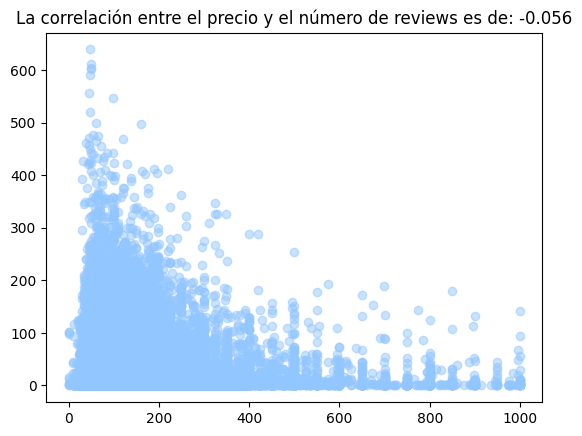

In [109]:
ex20 = df.loc[df.loc[:,"price"] < 1000]
plt.scatter(ex20.loc[:,'price'], ex20.loc[:,'number_of_reviews'], alpha=0.5)
correlacion20 = (ex20.loc[:,"price"].corr(ex20.loc[:,"number_of_reviews"])).round(3)
plt.title(f'La correlación entre el precio y el número de reviews es de: {correlacion20}')

In [ ]:
corr = ... calcula la correlacion

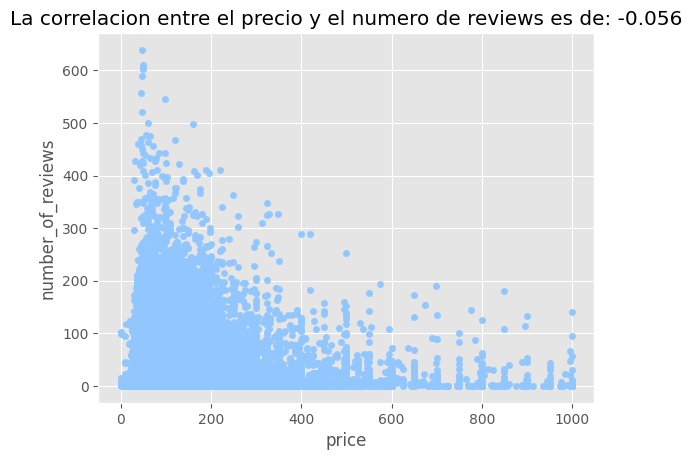

### EXTRA


21. **Propiedades de anfitriones con múltiples listados.** Filtra los anfitriones con más de 5 listados en el dataset y calcula el precio promedio de sus propiedades.

**Hint:** Haz un value counts, quedate los que tengan mas de 5, filtra el dataset con esos y saca la media.


In [148]:
ex21 = df.loc[:,"host_name"].value_counts().reset_index()
ex21 = ex21.loc[ex21.loc[:,"count"] > 5]
names = ex21.loc[:,"host_name"].unique()
ex21_multiple = df.loc[df.loc[:,"host_name"].isin(names)]
ex21_multiple.loc[:,"price"].mean()


np.float64(155.35065169079223)

In [ ]:


avg_price_multi_listing


np.float64(171.55128205128204)


22. **Variación de precios entre propiedades con menos y más de 100 reseñas.** Divide los datos en dos grupos: propiedades con menos de 100 reseñas y con más de 100 reseñas, y compara el precio promedio de cada grupo.


In [154]:
less_reviews = df.loc[df.loc[:,"number_of_reviews"] < 100,:].loc[:,"price"].mean()
more_reviews = df.loc[df.loc[:,"number_of_reviews"] >= 100,:].loc[:,"price"].mean()

print("Precio medio con menos de 100 reseñas: ", less_reviews)
print("Precio medio con mas de 100 reseñas: ", more_reviews)

Precio medio con menos de 100 reseñas:  153.14252667874212
Precio medio con mas de 100 reseñas:  125.99736928641894


In [149]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,46,14/7/2019,0.39,2,288
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,274,26/7/2019,4.64,1,212
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,75,21/7/2019,0.60,1,127


In [ ]:



print("Precio medio con menos de 100 reseñas: ", less_reviews)
print("Precio medio con mas de 100 reseñas: ", more_reviews)

Precio medio con menos de 100 reseñas:  153.14252667874212
Precio medio con mas de 100 reseñas:  125.99736928641894



23. **Distribución de precios entre diferentes tipos de habitación, según si tienen más o menos de 50 reseñas.** Crea una columna para clasificar los listados en dos grupos según el número de reseñas y grafica la distribución de precios para cada grupo y tipo de habitación.

**RECUERDA:** Haz un unstack tras el groupby para que el grafico de barras te quede agrupado.


<Axes: xlabel='class_reviews'>

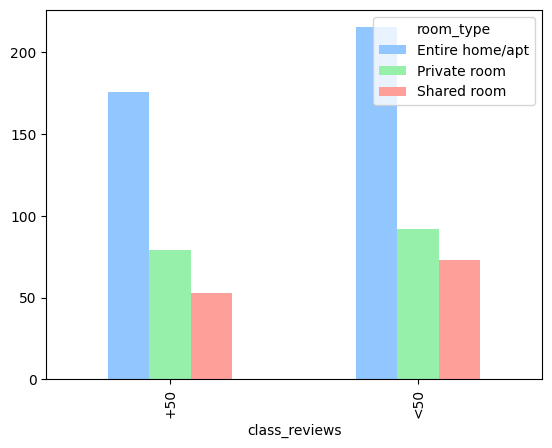

In [167]:
ex23 = df.copy()
ex23.loc[ex23.loc[:,"number_of_reviews"] < 50,"class_reviews"] = "<50"
ex23.loc[ex23.loc[:,"number_of_reviews"] >= 50,"class_reviews"] = "+50"
ex23_sol = ex23.groupby(["class_reviews","room_type"])["price"].mean().unstack()
ex23_sol.plot(kind="bar")

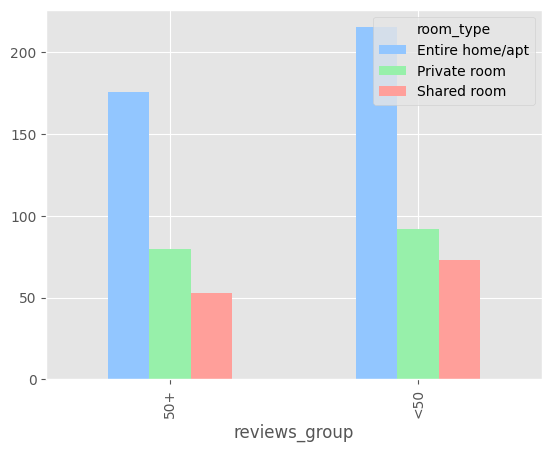


24. **Diferencias de precio entre barrios en propiedades con reseñas recientes.** Filtra las propiedades con reseñas a partir de enero de 2023 y calcula el precio promedio por barrio para ver si hay diferencias respecto al promedio general.

**HINT**: Se puede filtrar por un mayor que ">" sin problema  por el formato de fecha.


C:\Users\Usuario\AppData\Local\Temp\ipykernel_35132\317837682.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  ex24['last_review'] = pd.to_datetime(ex24['last_review'], errors='coerce')


<Axes: xlabel='neighbourhood_group'>

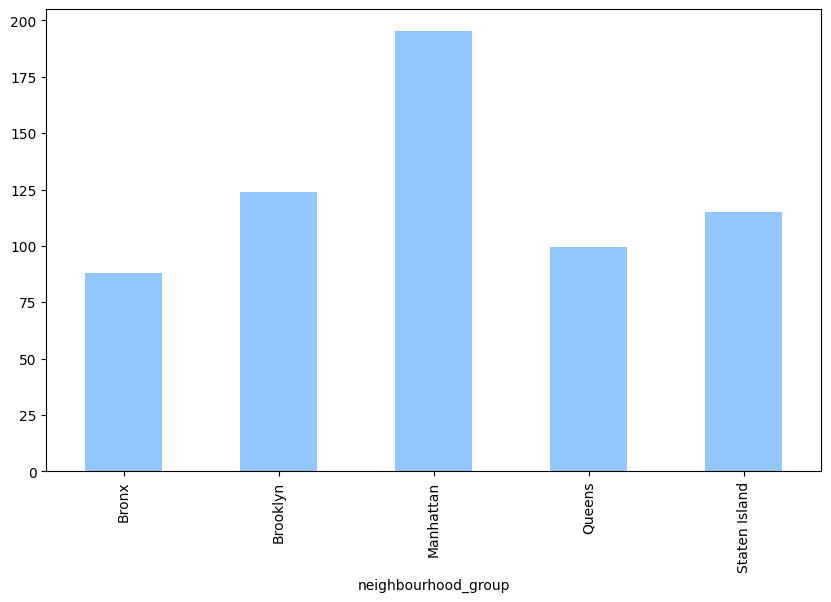

In [207]:
ex24 = df.copy()
ex24['last_review'] = pd.to_datetime(ex24['last_review'], errors='coerce')


ex24_recent = ex24.loc[ex24.loc[:,'last_review'] >= "2019-01-01"]


df_grafica1 = ex24.groupby(["neighbourhood_group",])["price"].mean()
df_grafica2 = ex24_recent.groupby(["neighbourhood_group",])["price"].mean()

fig, ax = plt.subplots(figsize=(10, 6))

df_grafica1.plot(kind="bar",ax=ax)
df_grafica2.plot(kind="bar",ax=ax)



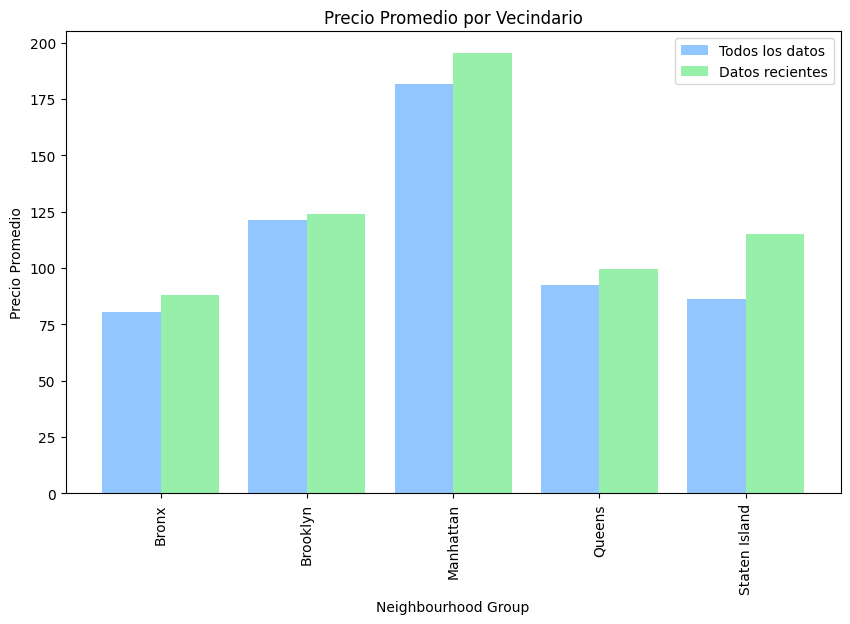

In [209]:
# Agrupaciones para el precio promedio por neighbourhood_group
df_grafica1 = ex24_recent.groupby("neighbourhood_group")["price"].mean().rename("Datos recientes")
df_grafica2 = ex24.groupby("neighbourhood_group")["price"].mean().rename("Todos los datos")


# Combina ambas series en un solo dataframe
df_combined = pd.concat([df_grafica1, df_grafica2], axis=1)

# Graficar las barras agrupadas
fig, ax = plt.subplots(figsize=(10, 6))
df_combined.plot(kind="bar", ax=ax, width=0.8)

# Añadir etiquetas y título
plt.title("Precio Promedio por Vecindario")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Precio Promedio")
plt.legend(["Todos los datos", "Datos recientes"])  # Añadir leyenda para distinguir las dos series
plt.show()


<Axes: xlabel='neighbourhood_group'>

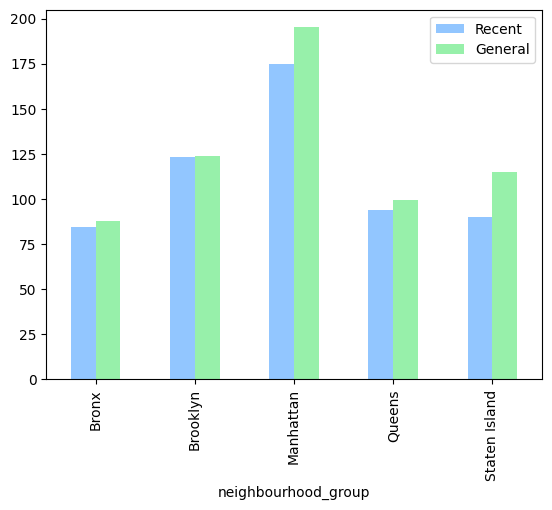


25. **Relación entre precio y noches mínimas en cada barrio usando una regresión lineal.** Usa `seaborn` para hacer una regresión entre el precio y las noches mínimas en cada barrio y analiza si existe una relación fuerte.


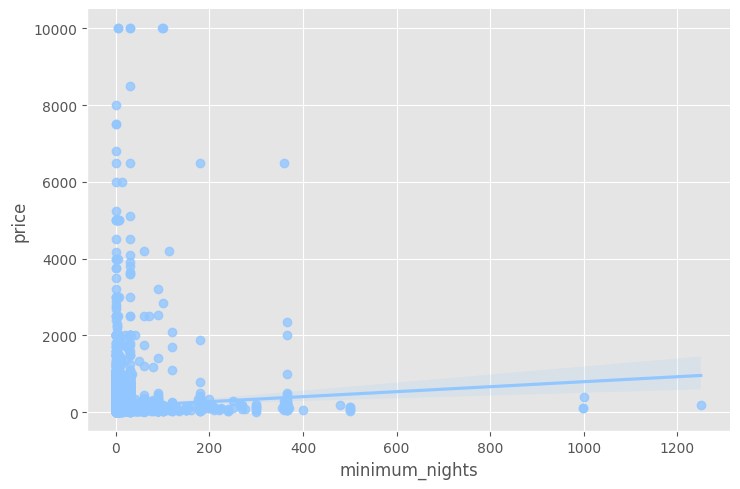

In [ ]:

import seaborn as sns

sns.lmplot ... 




26. **Comparación de precios entre listados con políticas de cancelación flexible y estricta.** Añade una columna que simule políticas de cancelación (por ejemplo, asignando 'Flexible' o 'Strict' al azar `np.random.choice(['Flexible', 'Strict'])` y compara el precio promedio entre ambos grupos.


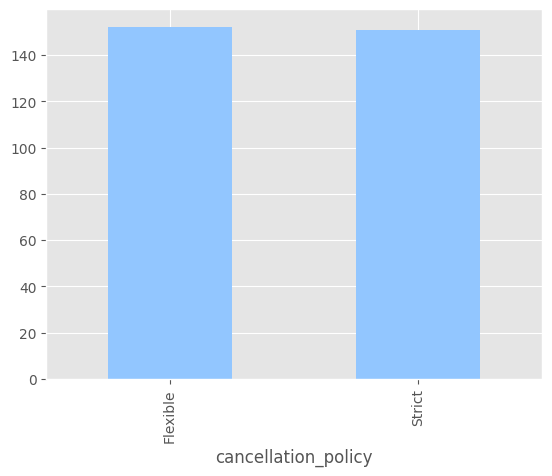